# Run All

## Import and Load

Import library yang diperlukan

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns

Mengatur style

In [2]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])

Load dataset

In [3]:
df_match = pd.read_excel('https://drive.google.com/uc?id=1Q3LRfFwMWOKpO69shh3gXtRylKkTmD2s')

Melihat data teratas

In [4]:
df_match.head()

,kill,death,assist,gold,minutes,gpm,hero_damage,turret_damage,damage_taken,teamfight_part,win,score
0,6.0,1.0,7.0,5958.0,8.0,745,26.0,8.0,25.0,42.0,1.0,8.9
1,6.0,3.0,7.0,7801.0,8.0,975,19.0,47.0,21.0,42.0,1.0,8.5
2,3.0,1.0,10.0,4912.0,8.0,614,7.0,2.0,28.0,42.0,1.0,8.4
3,7.0,1.0,6.0,6392.0,8.0,799,20.0,12.0,15.0,42.0,1.0,8.6
4,9.0,1.0,3.0,8634.0,8.0,1079,28.0,30.0,11.0,39.0,1.0,9.3


## Data Exploration

Melihat informasi dataset

In [5]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kill            404 non-null    float64
 1   death           404 non-null    float64
 2   assist          404 non-null    float64
 3   gold            404 non-null    float64
 4   minutes         404 non-null    float64
 5   gpm             404 non-null    int64  
 6   hero_damage     404 non-null    float64
 7   turret_damage   404 non-null    float64
 8   damage_taken    404 non-null    float64
 9   teamfight_part  404 non-null    float64
 10  win             404 non-null    float64
 11  score           404 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 38.0 KB


Ukuran dataset

In [6]:
df_match.shape

(404, 12)

Deskripsi statistik

In [7]:
np.around(df_match.describe(), decimals=3)

,kill,death,assist,gold,minutes,gpm,hero_damage,turret_damage,damage_taken,teamfight_part,win,score
count,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000,404.000
mean,5.376,5.361,8.062,11171.745,16.931,662.495,20.020,19.550,20.025,51.094,0.505,7.182
std,3.836,2.911,5.107,3390.894,4.671,108.800,7.428,22.504,8.257,16.229,0.501,2.190
min,0.000,0.000,0.000,3940.000,8.000,465.000,6.000,0.000,5.000,0.000,0.000,3.000
25%,2.000,3.000,4.000,8594.500,13.000,582.750,14.000,1.000,13.000,39.000,0.000,5.400
50%,4.000,5.000,7.000,10852.500,16.000,651.000,20.000,11.000,18.000,50.000,1.000,7.200
75%,8.000,7.000,10.000,13200.750,20.000,723.250,25.000,32.000,26.000,63.250,1.000,8.700
max,20.000,15.000,32.000,21920.000,27.000,1079.000,40.000,100.000,49.000,100.000,1.000,12.800


## Data Preprocessing

Membuang kolom yang tidak perlu. Hanya menggunakan gpm saja di mana gpm = gold / minutes

In [8]:
df_match.drop(columns=['gold', 'minutes'], inplace=True)
df_match.head()

,kill,death,assist,gpm,hero_damage,turret_damage,damage_taken,teamfight_part,win,score
0,6.0,1.0,7.0,745,26.0,8.0,25.0,42.0,1.0,8.9
1,6.0,3.0,7.0,975,19.0,47.0,21.0,42.0,1.0,8.5
2,3.0,1.0,10.0,614,7.0,2.0,28.0,42.0,1.0,8.4
3,7.0,1.0,6.0,799,20.0,12.0,15.0,42.0,1.0,8.6
4,9.0,1.0,3.0,1079,28.0,30.0,11.0,39.0,1.0,9.3


Melihat korelasi antar kolom

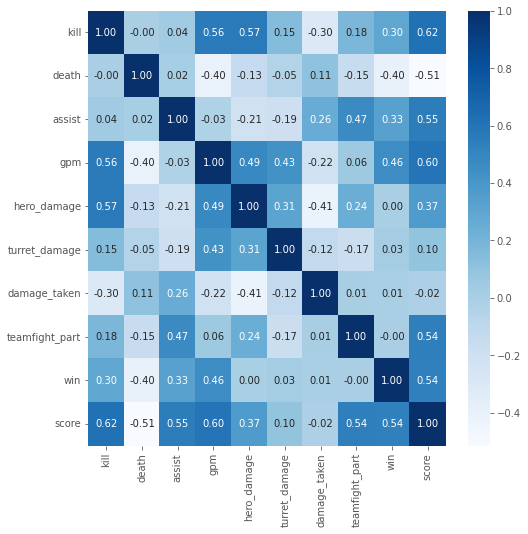

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_match.corr(), cmap='Blues', annot=True, fmt='.2f')

Memilih fitur dengan nilai korelasi > 0.5 atau < -0.5 terhadap score

In [10]:
df_match = df_match[['kill', 'death', 'assist', 'gpm', 'teamfight_part', 'win', 'score']]

## Modeling

### Split train-test

In [11]:
X = df_match.iloc[:,:-1]
X.head()

,kill,death,assist,gpm,teamfight_part,win
0,6.0,1.0,7.0,745,42.0,1.0
1,6.0,3.0,7.0,975,42.0,1.0
2,3.0,1.0,10.0,614,42.0,1.0
3,7.0,1.0,6.0,799,42.0,1.0
4,9.0,1.0,3.0,1079,39.0,1.0


In [12]:
y = df_match.iloc[:,-1]
y.head()

0    8.9
1    8.5
2    8.4
3    8.6
4    9.3
Name: score, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 3)

### Model Regresi Linear

In [14]:
model_regresi = LinearRegression()

In [15]:
model_regresi.fit(X_train, y_train)

LinearRegression()

Score R2

In [16]:
model_regresi.score(X_train, y_train)

0.9622221092207643

Koefisien dari persamaan regresi

In [17]:
model_regresi.coef_

array([ 0.27109702, -0.32408744,  0.20936271,  0.00331038,  0.02022654,
       -0.05238146])

Konstanta persamaan regresi

In [18]:
model_regresi.intercept_

2.5837641270148257

Persamaan regresi

In [19]:
print("Persamaan Regresinya adalah = " + str(np.around(model_regresi.intercept_, decimals=3)), end="")
for i in range(len(model_regresi.coef_)):
  print(" + " + str(np.around(model_regresi.coef_[i], decimals=3)) + "x" + str(i+1), end="")

Persamaan Regresinya adalah = 2.584 + 0.271x1 + -0.324x2 + 0.209x3 + 0.003x4 + 0.02x5 + -0.052x6

## Evaluation

Memprediksi dengan X_test

In [20]:
hasil_prediksi = model_regresi.predict(X_test)

Perbandingan aktual dan prediksi pada data test

In [21]:
perbandingan_prediksi = pd.DataFrame({
    'aktual' : y_test,
    'prediksi' : np.around(hasil_prediksi, decimals=1)
})

perbandingan_prediksi.sample(30)

,aktual,prediksi
37,5.8,5.7
261,3.0,2.9
61,7.4,7.5
130,8.2,7.1
98,4.9,5.2
237,5.2,6.1
123,8.7,8.7
221,4.7,4.6
155,5.6,5.8
128,6.8,7.1


Perbandingan Nilai Aktual dan Prediksi (Visualisasi)

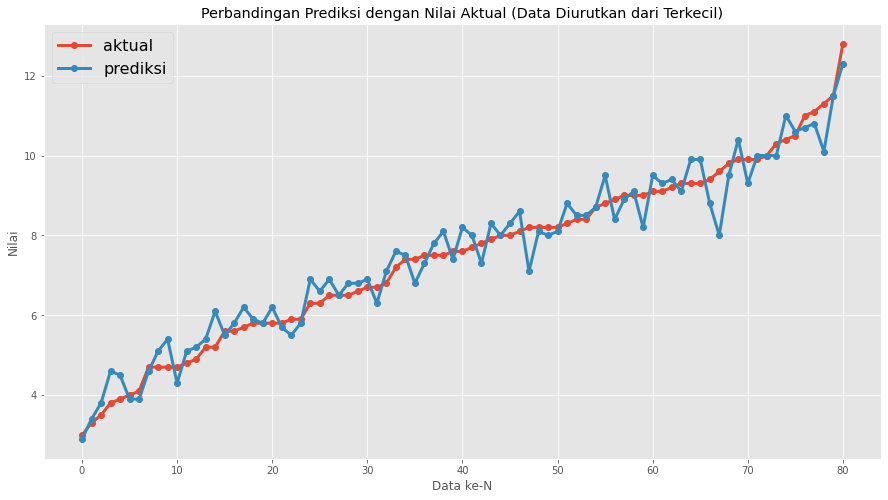

In [22]:
plt.plot(perbandingan_prediksi.sort_values(by = ['aktual']).reset_index(drop = True),
         linewidth = 3,
         marker = 'o'
         )
plt.title('Perbandingan Prediksi dengan Nilai Aktual (Data Diurutkan dari Terkecil)')
plt.xlabel('Data ke-N')
plt.ylabel('Nilai')
plt.legend(perbandingan_prediksi.columns, fontsize=16)
plt.show()

In [23]:
prediksi_train = model_regresi.predict(X_train)

Evaluasi pada Data Train

In [24]:
nilai_r2_train = r2_score(y_train, prediksi_train)
nilai_rmse_train = mean_squared_error(y_train, prediksi_train, squared=False)
nilai_mae_train = mean_absolute_error(y_train, prediksi_train)
print("Evaluasi pada Data Train")
print("Nilai R2 = ", nilai_r2_train)
print("Nilai RMSE = ", nilai_rmse_train)
print("Nilai MAE = ", nilai_mae_train)

Evaluasi pada Data Train
Nilai R2 =  0.9622221092207643
Nilai RMSE =  0.42531539045535854
Nilai MAE =  0.3404617813229758


Evaluasi pada Data Test

In [25]:
nilai_r2_test = r2_score(y_test, hasil_prediksi)
nilai_rmse_test = mean_squared_error(y_test, hasil_prediksi, squared=False)
nilai_mae_test = mean_absolute_error(y_test, hasil_prediksi)
print("Evaluasi pada Data Test")
print("Nilai R2 = ", nilai_r2_test)
print("Nilai RMSE = ", nilai_rmse_test)
print("Nilai MAE = ", nilai_mae_test)

Evaluasi pada Data Test
Nilai R2 =  0.9553776210403336
Nilai RMSE =  0.4556225749291867
Nilai MAE =  0.3560316463908027
